# Grafos

* Matías Battocchia
* Científico de datos en [Mutt Data](https://www.muttdata.ai)
* Tesista en [CoCuCo Lab](https://www.cocucolab.com)
* battox@gmail.com

### ¿Qué es un grafo?

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg" width=200>

* Red — grafo, *graph*
  * Nodos — vértices, *nodes*
  * Conexiones — aristas, bordes, *edges*

### ¿Para qué sirven?

#### Redes de transporte

<img src="https://sites.google.com/site/aplicaciongrafos/_/rsrc/1320026146976/home/ciudades.PNG" width=600>

#### Redes de interacción

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Network_representation_of_brain_connectivity.JPG/1280px-Network_representation_of_brain_connectivity.JPG" width=600>

#### Redes de comunicación

<img src="https://www.researchgate.net/profile/Santiago_Bianco/publication/309278789/figure/fig25/AS:750920430284803@1556044790504/Ejemplo-de-red-de-comunicacion-con-componentes-electronicos-y-su-posible-modelizacion.jpg" width=700>

Es una estructura de datos útil para representar:

* redes sociales
* máquinas de estado
* moléculas
* mapas conceptuales
* estructura del lenguaje
* redes de transporte
* y mucho más...

Ver [glosario de teoría de grafos](https://es.wikipedia.org/wiki/Anexo:Glosario_de_teor%C3%ADa_de_grafos).

## NetworkX

https://networkx.github.io

NetworkX es un paquete de Python para la creación, manipulación, y el estudio de la estructura, dinámica, y las funciones de las redes complejas.

In [ ]:
!pip install networkx

In [1]:
%matplotlib inline

import networkx as nx

G = nx.Graph()

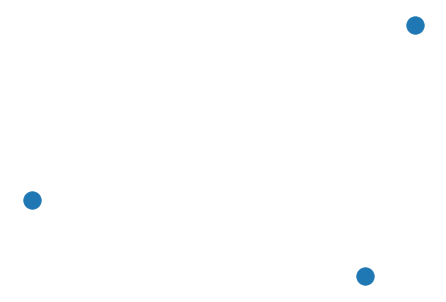

In [24]:
G.add_node('Buenos Aires')
G.add_node('Córdoba')
G.add_node('Mendoza')

nx.draw(G)

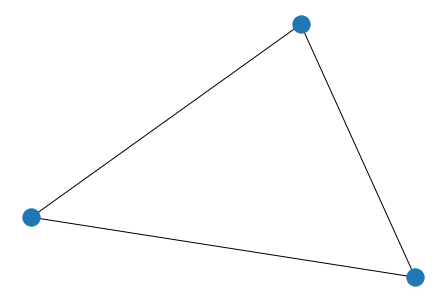

In [25]:
G.add_edge('Buenos Aires', 'Córdoba', distancia=647)
G.add_edge('Buenos Aires', 'Mendoza', distancia=948)
G.add_edge('Córdoba',      'Mendoza', distancia=682)

nx.draw(G)

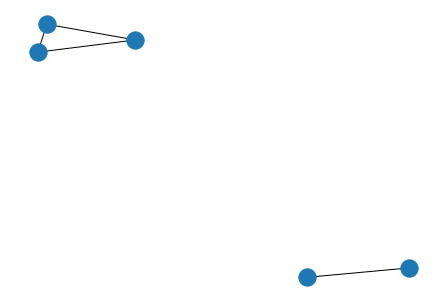

In [26]:
G.add_edge('Tucumán','Salta', distancia=227)

nx.draw(G)

* **Subgrafo**: subconjunto de nodos y conexiones.
* **Componente conectada**: grupo de nodos conectados.

In [54]:
G.nodes

NodeView(('Buenos Aires', 'Córdoba', 'Mendoza', 'Tucumán', 'Salta'))

In [55]:
G.edges

EdgeView([('Buenos Aires', 'Córdoba'), ('Buenos Aires', 'Mendoza'), ('Córdoba', 'Mendoza'), ('Tucumán', 'Salta')])

In [57]:
# grado de un nodo (cantidad de conexiones)
G.degree['Mendoza']

2

### Graficando

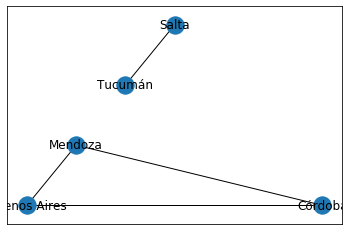

In [53]:
# posiciones de los nodos; elegir un *layout*
pos=nx.planar_layout(G)

# dibujar etiquetas
nx.draw_networkx_labels(G, pos=pos)

# dibujar nodos
nx.draw_networkx_nodes(G, pos=pos)

# dibujar conexiones
nx.draw_networkx_edges(G, pos=pos);

Graficar grafos no es una tarea sencilla y NetworkX lo deja en mano de otras aplicaciones, como [Gephi](https://gephi.org).

## Tipos de grafos

### Dirigido

`nx.DiGraph`

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a2/Directed.svg" width=200>

### Multigrafo

`nx.MultiGraph`, `nx.MultiDiGraph`

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c9/Multi-pseudograph.svg" width=200>

## Algoritmos comunes

### Grafo de ejemplo: Familias florentinas

Familias que se disputaron el control político de la ciudad de Florencia alrededor de 1430. Dos facciones fueron dominantes en la disputa: Medicis y Strozzis.

Dataset de uniones maritales y de negocio entre familias.

Fuente: *Padgett, J. F., & Ansell, C. K. (1993). Robust Action and the Rise of the Medici, 1400-1434. American Journal of Sociology, 98(6), 1259-1319.*

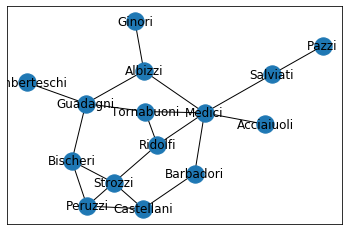

In [7]:
G = nx.florentine_families_graph()

nx.draw_networkx(G)

In [4]:
G.nodes

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

## Componentes conectadas

https://en.wikipedia.org/wiki/Component_(graph_theory)

<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Pseudoforest.svg" width=200>

In [64]:
# el grafo de ejemplo solo tiene una componente conectada
for sub_graph in nx.connected_components(G):
    print(sub_graph)

{'Strozzi', 'Bischeri', 'Acciaiuoli', 'Salviati', 'Pazzi', 'Castellani', 'Ridolfi', 'Albizzi', 'Peruzzi', 'Medici', 'Ginori', 'Lamberteschi', 'Barbadori', 'Tornabuoni', 'Guadagni'}


## El camino más corto

https://en.wikipedia.org/wiki/Shortest_path_problem

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Shortest_path_with_direct_weights.svg" width=200>

#### Aplicaciones

* Google Maps
* LinkedIn

In [7]:
nx.shortest_path(G, source='Medici', target='Strozzi', weight=None)

['Medici', 'Ridolfi', 'Strozzi']

## Árbol recubridor mínimo

https://en.wikipedia.org/wiki/Minimum_spanning_tree

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Minimum_spanning_tree.svg" width=200>

#### Aplicaciones

* Tendido de redes

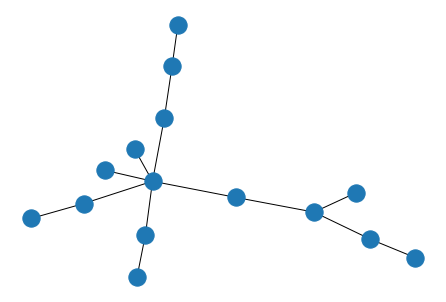

In [68]:
mst = nx.minimum_spanning_tree(G, weight=None)

nx.draw(mst)

## Pagerank

https://en.wikipedia.org/wiki/PageRank

<img src="https://upload.wikimedia.org/wikipedia/en/8/8b/PageRanks-Example.jpg" width=200>

In [20]:
rank = nx.pagerank(G, weight=None)

sorted(rank.items(), key=lambda item: item[1], reverse=True)

[('Medici', 0.14581844065218275),
 ('Guadagni', 0.09839859717156552),
 ('Strozzi', 0.08809849082725613),
 ('Albizzi', 0.079121502380729),
 ('Tornabuoni', 0.07127928374676082),
 ('Ridolfi', 0.069574170990148),
 ('Castellani', 0.06933028447008721),
 ('Bischeri', 0.0688615381141211),
 ('Peruzzi', 0.06787531774407572),
 ('Salviati', 0.061302640987807314),
 ('Barbadori', 0.050300712744633685),
 ('Pazzi', 0.036054222996734095),
 ('Ginori', 0.032418257716596434),
 ('Lamberteschi', 0.03090932465499793),
 ('Acciaiuoli', 0.03065721480230426)]

Ejemplo de uso en aprendizaje automático: [Red de influencia de inversores](https://towardsdatascience.com/investor-network-of-influence-f80f2a1af43f).

## Intermediación

https://en.wikipedia.org/wiki/Betweenness_centrality

<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/Graph_betweenness.svg" width=200>

In [21]:
rank = nx.betweenness_centrality(G, weight=None)

sorted(rank.items(), key=lambda item: item[1], reverse=True)

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355),
 ('Bischeri', 0.1043956043956044),
 ('Strozzi', 0.10256410256410257),
 ('Barbadori', 0.09340659340659341),
 ('Tornabuoni', 0.09157509157509157),
 ('Castellani', 0.05494505494505495),
 ('Peruzzi', 0.02197802197802198),
 ('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', 0.0)]

### Modularidad

https://en.wikipedia.org/wiki/Modularity_(networks)

<img src="https://www.pnas.org/content/pnas/103/23/8577/F1.large.jpg" width=200>

In [70]:
nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

[frozenset({'Acciaiuoli',
            'Medici',
            'Pazzi',
            'Ridolfi',
            'Salviati',
            'Tornabuoni'}),
 frozenset({'Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'}),
 frozenset({'Albizzi', 'Ginori', 'Guadagni', 'Lamberteschi'})]

## Pandas

In [8]:
import pandas as pd

df = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/bicicletas-publicas/recorridos-realizados-2019.csv', low_memory=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850451 entries, 0 to 2850450
Data columns (total 19 columns):
id_usuario                    object
edad_usuario                  float64
genero_usuario                object
fecha_origen_recorrido        object
id_estacion_origen            object
nombre_estacion_origen        object
direccion_estacion_origen     object
capacidad_estacion_origen     float64
lat_estacion_origen           float64
long_estacion_origen          float64
duracion_recorrido            object
fecha_destino_recorrido       object
id_estacion_destino           object
nombre_estacion_destino       object
direccion_estacion_destino    object
capacidad_estacion_destino    float64
lat_estacion_destino          float64
long_estacion_destino         float64
servicio                      object
dtypes: float64(7), object(12)
memory usage: 413.2+ MB


In [10]:
df.head()

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo


El DataFrame debe contener al menos dos columnas con nombres de nodos (origen y destino) y cero o más columnas con atributos de las conexiones.

**Cada fila se procesa como una conexión**.

In [11]:
df['minutos_viaje'] = pd.to_timedelta(df.duracion_recorrido, unit='minute', errors='coerce')

In [12]:
pre_grafo = df.groupby(['nombre_estacion_origen','nombre_estacion_destino']) \
    .minutos_viaje \
    .mean(numeric_only=False) \
    .to_frame() \
    .reset_index()

#.agg( lambda x: x.mean() )
pre_grafo.head()

,nombre_estacion_origen,nombre_estacion_destino,minutos_viaje
0,11 de septiembre,11 de septiembre,00:40:07.839506
1,11 de septiembre,33 Orientales,01:44:11
2,11 de septiembre,ARAOZ,00:43:33
3,11 de septiembre,ARENALES Y AGUERO,00:42:23
4,11 de septiembre,AUSTRIA Y FRENCH,01:20:06


In [30]:
estaciones = nx.convert_matrix.from_pandas_edgelist(
    pre_grafo,
    source='nombre_estacion_origen',
    target='nombre_estacion_destino',
    edge_attr='minutos_viaje'
)

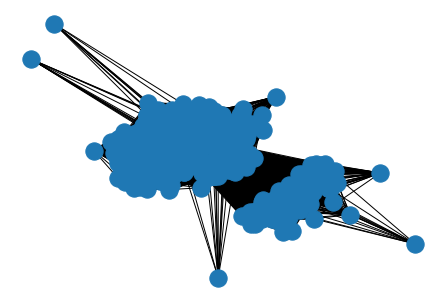

In [32]:
nx.draw(estaciones)

😱 😱 😱

## Práctica

### Dataset

https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

### Ideas

* https://medium.com/@fcatalano/bicisendas-en-buenos-aires-a29f62bc9e7c — "La red de bicicletas fue diagramada como un **grafo dirigido**. Esto, porque nos interesaba representar los recorridos realizados respetando el sentido de los viajes."

  * Análisis exploratorio del dataset
  * Análisis de *in-degree* y *out-degree*

* https://towardsdatascience.com/buenos-aires-bicycle-lanes-ii-1a40b13ccc25 — "\[...\] we built a graph **where two users shared a link if and only if at least one of them had taken a bicycle at approximately the same time from the same station, and returned them together** (also to the same station)."

  * Distribución grados
  * Análisis exploratorio del grafo

* https://medium.com/@martinpalazzo/buenos-aires-bicycle-lanes-iii-d0ca4539e767 — "The first step to understand the communities of stations is to build a network where each node is a station and **each edge between station is the quantity of bicycle journeys**."

  * Modularidad
  * Clustering espectral